In [1]:
from delayfunctions import *

data = pd.read_csv('sensL sipm delays 20 cm/SNSL_sipm_trace_20_f/Capture #11.csv', skiprows=1)

signal1 = scipy.ndimage.gaussian_filter(np.array(data['1 (VOLT)']), 20)
signal2 = scipy.ndimage.gaussian_filter(np.array(data['4 (VOLT)']), 20)

time = np.array(data['Time (s)'])

time1, cdf1 = cdf(signal1, time, 0.5)
time2, cdf2 = cdf(signal2, time, 0.5)

In [2]:
time_delay_cdf(cdf1, cdf2, time1, time2)

(array([4.0625e-09]), array([1.8515625e-08]), array([-1.4453125e-08]))

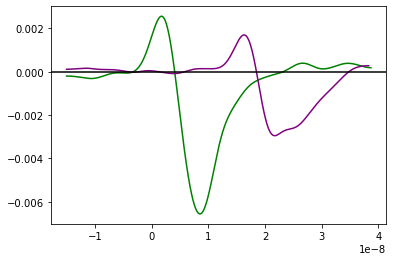

[]

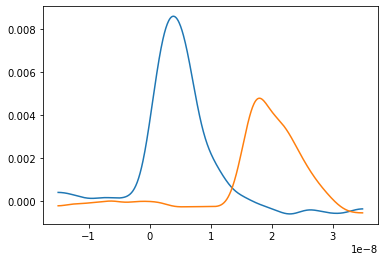

In [3]:
#plt.plot(signal, color='black', label= 'original signal')
#plt.plot(atten, color='red', label='attenuated signal')
#plt.plot(inverted, color='orange', label='inverted signal')
#plt.plot(shifted, color='blue', label='shifted signal')
plt.plot(time1, cdf1, color='green', label= '1')
plt.plot(time2, cdf2, color='purple', label= '4')
plt.axhline(0, color='black')

plt.show()
plt.plot(time, signal1)
plt.plot(time, signal2)
plt.plot()

#plt.plot(signal, color='black')
#plt.plot(cdf, color='orange')
#plt.legend()
#plt.plot()

In [4]:
from delayfunctions import *
time_delays = []
path = 'sensL sipm delays 40 cm/SNSL_sipm_trace_40_3'
csv_files = glob.glob(os.path.join(path, "*.csv"))
for f in csv_files:
    


    #print("Capture: #", counter)
    # read the csv file
    data = pd.read_csv(f, skiprows=1)
    
    p1 = scipy.ndimage.gaussian_filter(np.array(data['1 (VOLT)']), 30)
    p2 = scipy.ndimage.gaussian_filter(np.array(data['4 (VOLT)']), 30)

    
    if(all(i < 0.001 for i in p1) or all(i < 0.001 for i in p2)):
        continue
    time = np.array(data['Time (s)'])
    
    time1, cdf1 = cdf(p1, time, 0.8)
    time2, cdf2 = cdf(p2, time, 0.8)
    
    
    t1, t2, td = time_delay_cdf(cdf1, cdf2, time1, time2)


    '''plt.plot(time1, cdf1, color='green', label= '1')
    plt.plot(time2, cdf2, color='purple', label= '4')
    plt.axhline(0, color='black')
    plt.axvline(t1, color='green')
    plt.axvline(t2, color='purple')
    plt.show()'''


    
    time_delays.append(td)

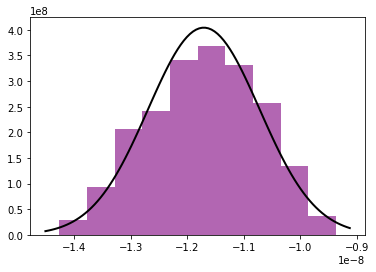

In [5]:
plt.hist(np.array(time_delays), density=True, alpha=0.6, color='purple', bins=10)
mu, std = norm.fit(time_delays)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.show()

In [6]:
mean_rounded = "{:.3f}".format((np.mean(time_delays)) * 10 ** 9)
sr_rounded = "{:.3f}".format((np.std(time_delays)) * 10 ** 9)
median_rounded = "{:.3f}".format((np.median(time_delays)) * 10 ** 9)

mean = "Mean: " + str(mean_rounded) + " ns"
SD = "Standard Deviation: " + str(sr_rounded) + " ns"
median = "Median: " + str(median_rounded) + " ns"

print(mean)
print(SD)
print(median)

Mean: -11.706 ns
Standard Deviation: 0.987 ns
Median: -11.645 ns
